# DAT210x - Programming with Python for DS

## Module6- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


import pandas as pd
import numpy as np 
import time

C = 1
kernel = 'linear'
iterations = 5000
n_neighbors=5
max_depth=9

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True
#model = tree.DecisionTreeClassifier(ma)

In [2]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty
    
    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.iloc[:, [row,col]]
            X_test_bag = X_test.iloc[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.iloc[:, 0].min() - padding, X_train_bag.iloc[:, 0].max() + padding
            y_min, y_max = X_train_bag.iloc[:, 1].min() - padding, X_train_bag.iloc[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.iloc[:, 0], X_train_bag.iloc[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [3]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:

        score = model.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

In [7]:
X = pd.read_csv('Datasets/wheat.data', index_col = 0)
X.dropna(inplace=True, axis = 0)
y=X['wheat_type'].map({'canadian':0, 'kama': 1, 'rosa': 2})
X.drop(['wheat_type'], inplace = True, axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=7)

SVC Results
5000 Iterations Training Time:  3.253026008605957
5000 Iterations Scoring Time:  1.4894700050354004
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


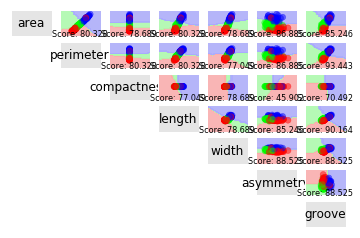

In [8]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

DTrees Results
5000 Iterations Training Time:  2.403993844985962
5000 Iterations Scoring Time:  1.1377761363983154
High-Dimensionality Score:  93.443
Max 2D Score:  90.164


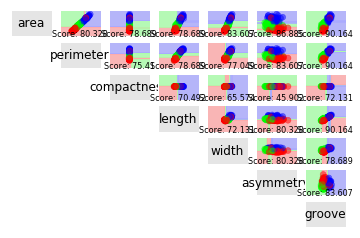

In [9]:
dtrees = tree.DecisionTreeClassifier(max_depth=max_depth)
dtrees.fit(X_train, y_train)
benchmark(dtrees, X_train, X_test, y_train, y_test, 'DTrees')
drawPlots(dtrees, X_train, X_test, y_train, y_test, 'DTrees')

KNN Results
5000 Iterations Training Time:  1.7994139194488525
5000 Iterations Scoring Time:  3.6309878826141357
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


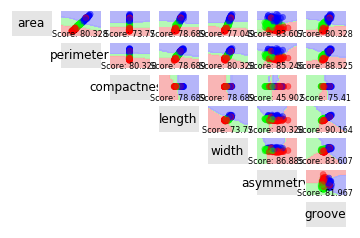

In [10]:
knn = KNeighborsClassifier(n_neighbors =n_neighbors)
knn.fit(X_train, y_train)
benchmark(knn, X_train, X_test, y_train, y_test, 'KNN')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNN')

Max depth: 9
DTrees Results
5000 Iterations Training Time:  2.5260260105133057
5000 Iterations Scoring Time:  1.2440400123596191
High-Dimensionality Score:  86.885
Max 2D Score:  90.164
Max depth: 8
DTrees Results
5000 Iterations Training Time:  2.6297779083251953
5000 Iterations Scoring Time:  1.615380048751831
High-Dimensionality Score:  86.885
Max 2D Score:  90.164
Max depth: 7
DTrees Results
5000 Iterations Training Time:  2.777843952178955
5000 Iterations Scoring Time:  1.1053311824798584
High-Dimensionality Score:  88.525
Max 2D Score:  90.164
Max depth: 6
DTrees Results
5000 Iterations Training Time:  2.960659980773926
5000 Iterations Scoring Time:  1.690596103668213
High-Dimensionality Score:  86.885
Max 2D Score:  90.164
Max depth: 5
DTrees Results
5000 Iterations Training Time:  3.651352882385254
5000 Iterations Scoring Time:  1.3908891677856445
High-Dimensionality Score:  86.885
Max 2D Score:  90.164
Max depth: 4
DTrees Results
5000 Iterations Training Time:  2.5650281906127

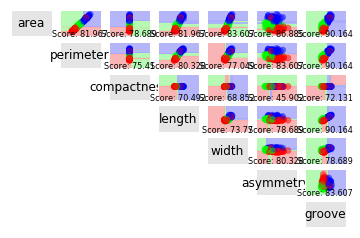

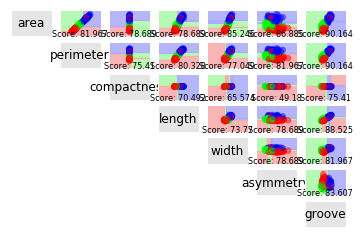

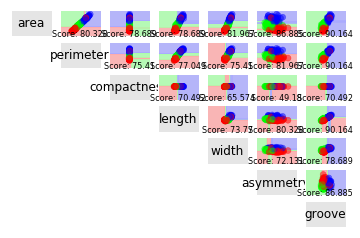

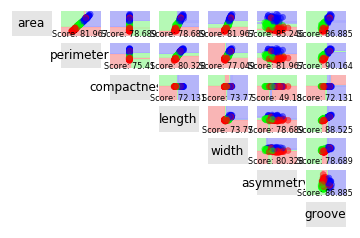

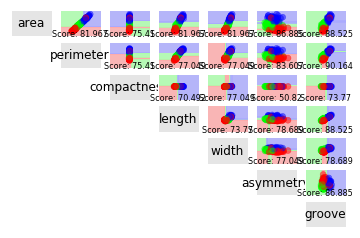

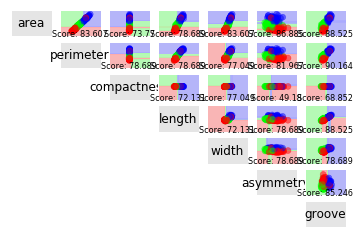

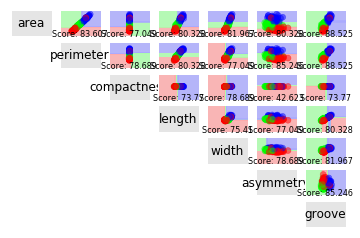

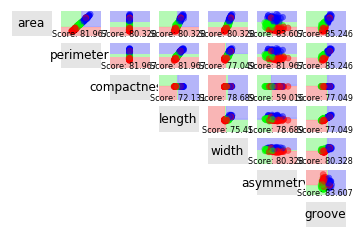

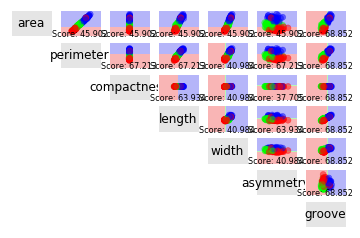

In [14]:
max_depth = 9
for i in reversed(list(range(1,max_depth+1))):
    print('Max depth: %s' % i)
    dtrees = tree.DecisionTreeClassifier(max_depth=i)
    dtrees.fit(X_train, y_train)
    benchmark(dtrees, X_train, X_test, y_train, y_test, 'DTrees')
    drawPlots(dtrees, X_train, X_test, y_train, y_test, 'DTrees')
    